Brain Stroke

A stroke is a medical condition in which poor blood flow to the brain causes cell death. There are two main types of stroke: ischemic, due to lack of blood flow, and hemorrhagic, due to bleeding. Both cause parts of the brain to stop functioning properly. Signs and symptoms of a stroke may include an inability to move or feel on one side of the body, problems understanding or speaking, dizziness, or loss of vision to one side. Signs and symptoms often appear soon after the stroke has occurred. If symptoms last less than one or two hours, the stroke is a transient ischemic attack (TIA), also called a mini-stroke. A hemorrhagic stroke may also be associated with a severe headache. The symptoms of a stroke can be permanent. Long-term complications may include pneumonia and loss of bladder control.

The main risk factor for stroke is high blood pressure. Other risk factors include high blood cholesterol, tobacco smoking, obesity, diabetes mellitus, a previous TIA, end-stage kidney disease, and atrial fibrillation. An ischemic stroke is typically caused by blockage of a blood vessel, though there are also less common causes. A hemorrhagic stroke is caused by either bleeding directly into the brain or into the space between the brain's membranes. Bleeding may occur due to a ruptured brain aneurysm. Diagnosis is typically based on a physical exam and is supported by medical imaging such as a CT scan or MRI scan. A CT scan can rule out bleeding, but may not necessarily rule out ischemia, which early on typically does not show up on a CT scan. Other tests such as an electrocardiogram (ECG) and blood tests are done to determine risk factors and rule out other possible causes. Low blood sugar may cause similar symptoms.

Prevention includes decreasing risk factors, surgery to open up the arteries to the brain in those with problematic carotid narrowing, and warfarin in people with atrial fibrillation. Aspirin or statins may be recommended by physicians for prevention. A stroke or TIA often requires emergency care. An ischemic stroke, if detected within three to four and half hours, may be treatable with a medication that can break down the clot. Some hemorrhagic strokes benefit from surgery. Treatment to attempt recovery of lost function is called stroke rehabilitation, and ideally takes place in a stroke unit; however, these are not available in much of the world.

Attribute Information
1) gender: "Male", "Female" or "Other"
2) age: age of the patient
3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
4) heart disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 
5) ever-married: "No" or "Yes"
6) worktype: "children", "Govtjov", "Neverworked", "Private" or "Self-employed"
7) Residencetype: "Rural" or "Urban"
8) avgglucoselevel: average glucose level in blood
9) bmi: body mass index
10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
11) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Source: https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset

In [1]:
# Data analysis and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


In [2]:
df = pd.read_csv("brain_stroke.csv")

In [3]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1


In [4]:
df.isna().sum();

In [5]:
#Encoder
categ = ['gender', 'ever_married','work_type', 'Residence_type', 'smoking_status']

# Encode Categorical Columns
le = preprocessing.LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

In [6]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1


In [7]:
# df.shape
# df["hypertension"].value_counts()
# df["heart_disease"].value_counts()
# df["ever_married"].value_counts()
df["stroke"].value_counts()


0    4733
1     248
Name: stroke, dtype: int64

* Total number: 4982
* Stroke: 248
* Hypertension: 479
* Heart disease: 275
* Married at least once: 3280 


In [8]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,0.416382,43.419859,0.096165,0.055210,0.658502,1.302349,0.508332,105.943562,28.498173,1.379442,0.049789
std,0.493008,22.662755,0.294848,0.228412,0.474260,0.860170,0.499981,45.075373,6.790464,1.072180,0.217531
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,14.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,77.230000,23.700000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,1.000000,91.850000,28.100000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,113.860000,32.600000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,271.740000,48.900000,3.000000,1.000000


<AxesSubplot:>

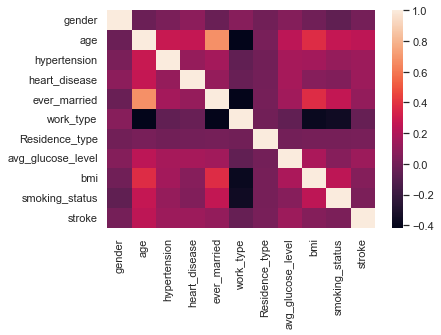

In [9]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr())

<AxesSubplot:>

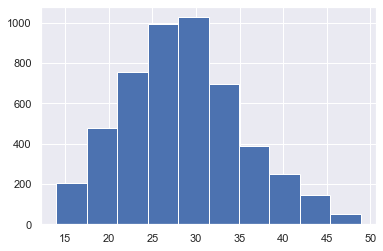

In [10]:
df["bmi"].hist()

<AxesSubplot:>

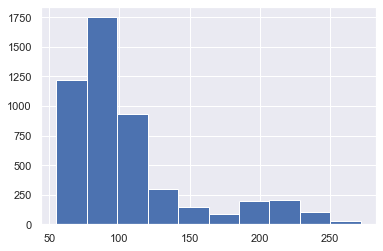

In [11]:
df["avg_glucose_level"].hist()

<AxesSubplot:>

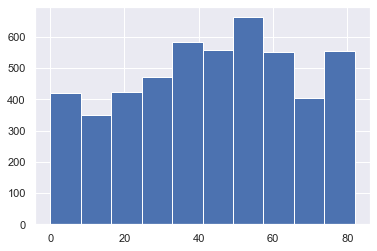

In [12]:
df["age"].hist()

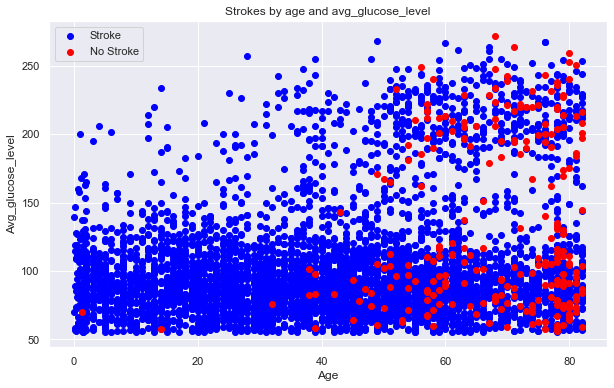

In [13]:
# Create a figure with width 10 and height 6
plt.figure(figsize=(10, 6))

# Create a scatter plot with negative results
plt.scatter(df.age[df.stroke==0],
            df.avg_glucose_level[df.stroke==0],
            c="blue")

# Create a scatter plot with possitive results
plt.scatter(df.age[df.stroke==1],
            df.avg_glucose_level[df.stroke==1],
            c="red")

# Add some helpful info
plt.title("Strokes by age and avg_glucose_level")
plt.xlabel("Age")
plt.ylabel("Avg_glucose_level")
plt.legend(["Stroke", "No Stroke"])

In [14]:
# Split data into X and Y
X = df.drop("stroke", axis = 1)
Y = df["stroke"]

In [15]:
np.random.seed(31)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [16]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data 
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(31)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [17]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

c:\Users\razva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9518555667001003,
 'KNN': 0.9478435305917753,
 'Random Forest': 0.9518555667001003}

In [18]:
# KNN tuning

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 95.19%


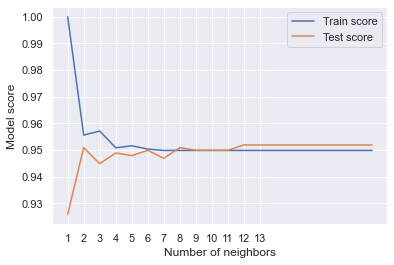

In [19]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 14))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [20]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [31]:
# Tune LogisticRegression

np.random.seed(31)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=100,
                                verbose=True)

rs_log_reg.fit(X_train, y_train)

c:\Users\razva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0001}

In [33]:
rs_log_reg.score(X_test, y_test)*100

95.18555667001003

In [34]:
# Tune RandomForestClassifier
np.random.seed(31)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [35]:
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 14,
 'min_samples_leaf': 13,
 'max_depth': 5}

In [36]:
rs_rf.score(X_test, y_test)*100

95.18555667001003